Assignment
Juan Jose Medina

In [ ]:
#ex 3
#(a) Explain how k-fold cross-validation is implemented.
# the data is divided into K parts, one for testing and the rest to be fitted, after we can get the MSE of the partition that
#was for evaluation, this process is reapeated k times changing the validation partition, afterwards we get the average of all the MSE

#(b) What are the advantages and disadvantages of k-fold
#advantage: can be applied to almost every statistical learning method
            #less computing hungry
#Disadvantage# dificult to determine the true test MSE
                #overestimation  the test set MSE to gain more flexibility


In [102]:
#ex8
set.seed (1)
x=rnorm (100)
y=x-2* x^2+ rnorm (100)
#[n =100], [p=2]
# y=x-2* x^2+ e

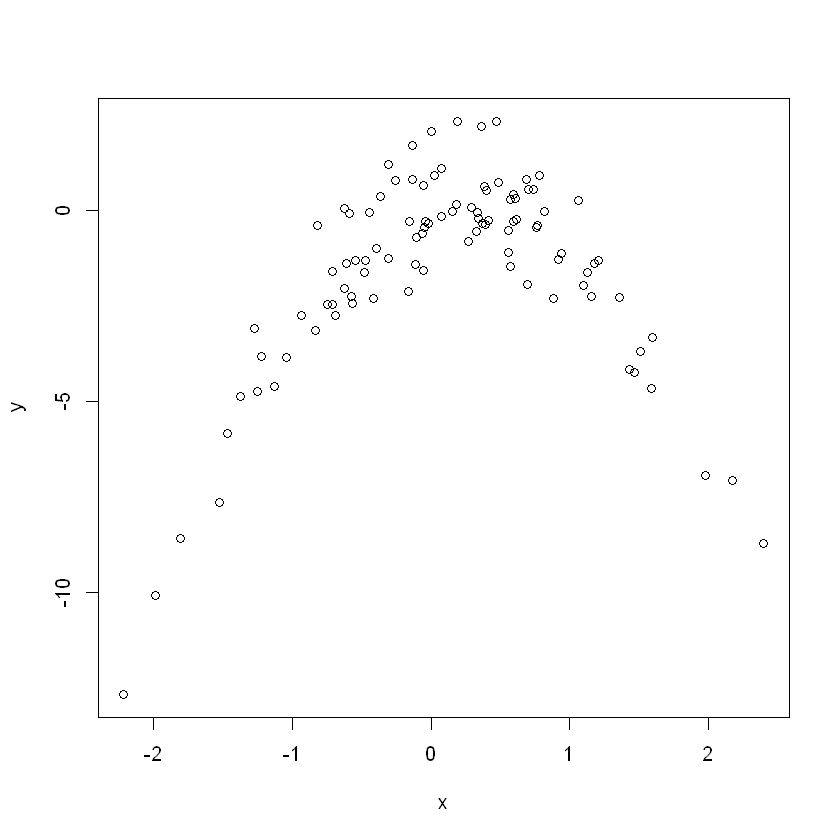

In [103]:
plot(x,y)
#There is a cuadratir relation between x and Y

In [104]:
set.seed (123)
library(boot)
df= data.frame(x,y)


In [105]:
#i. Y = β0 + β1X + ǫ

glm.fit = glm(y ~ x)
cv.error= cv.glm(df, glm.fit)
cv.error$delta

[1] 7.288162 7.284744

In [107]:
#ii. Y = β0 + β1X + β2X2 + ǫ

glm.fit = glm(y ~ poly(x,2))
cv.error= cv.glm(df, glm.fit)
cv.error$delta

[1] 0.9374236 0.9371789

In [108]:
#iii. Y = β0 + β1X + β2X2 + β3X3 + ǫ

glm.fit = glm(y ~ poly(x,3))
cv.error= cv.glm(df, glm.fit)
cv.error$delta

[1] 0.9566218 0.9562538

In [109]:
#Y = β0 + β1X + β2X2 + β3X3 + β4X4 + ǫ.

glm.fit = glm(y ~ poly(x,4))
cv.error= cv.glm(df, glm.fit)
cv.error$delta

[1] 0.9539049 0.9534453

In [110]:
#d)
# the results are the same, it is beacause LOOCV calculates the error per every single observation,

glm.fit = glm(y ~ x)
cv.error= cv.glm(df, glm.fit)
cv.error$delta


glm.fit = glm(y ~ poly(x,2))
cv.error= cv.glm(df, glm.fit)
cv.error$delta


glm.fit = glm(y ~ poly(x,3))
cv.error= cv.glm(df, glm.fit)
cv.error$delta


glm.fit = glm(y ~ poly(x,4))
cv.error= cv.glm(df, glm.fit)
cv.error$delta

[1] 7.288162 7.284744

[1] 0.9374236 0.9371789

[1] 0.9566218 0.9562538

[1] 0.9539049 0.9534453

In [ ]:
#e)
#the second model has the lowest error rate since the form of the data matches a quadratic formula

In [18]:
#F)
summary(glm.fit)
#p values show statistical significance for linear and quadratic betas


Call:
glm(formula = y ~ poly(x, 4))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0550  -0.6212  -0.1567   0.5952   2.2267  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.55002    0.09591 -16.162  < 2e-16 ***
poly(x, 4)1   6.18883    0.95905   6.453 4.59e-09 ***
poly(x, 4)2 -23.94830    0.95905 -24.971  < 2e-16 ***
poly(x, 4)3   0.26411    0.95905   0.275    0.784    
poly(x, 4)4   1.25710    0.95905   1.311    0.193    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.9197797)

    Null deviance: 700.852  on 99  degrees of freedom
Residual deviance:  87.379  on 95  degrees of freedom
AIC: 282.3

Number of Fisher Scoring iterations: 2


In [ ]:
#EX6.1
#a) the best subset has the smallest training RSS, while the other need a path and goes through iterations
#b) 
#c) TRUE - TRUE - TRUE - FALSE - FALSE

In [23]:
#ex 6.9
library(ISLR)
library(caTools)
#a
set.seed(101)
sample = sample.split(College, SplitRatio = .75)
train = subset(College, sample == TRUE)
test = subset(College, sample == FALSE)

In [29]:
#b
lm.fit = lm(Apps~.,data= train)
lm.predict = predict(lm.fit,test) 
TE = mean((test$Apps - lm.predict)^2)
TE

[1] 1203985

In [61]:
#C
library(glmnet)
x = model.matrix(Apps~.,train)[,-1]
y = train$Apps
grid=10^seq(10,-2, length =100)
ridge.mod = cv.glmnet(x,y,alpha=0, lambda=grid)
lambda = min(ridge.mod$lambda)
x2 = model.matrix(Apps~.,test)[,-1]
ridge.pred=predict(ridge.mod, x2,s=lambda)
TE = mean((test$Apps - ridge.pred)^2)
TE

[1] 1203827

In [62]:
#d)
lasso.mod = cv.glmnet(x,y,alpha=1, lambda=grid)
lambda = min(ridge.mod$lambda)
x2 = model.matrix(Apps~.,test)[,-1]
lasso.pred=predict(lasso.mod, x2,s=lambda)
TE = mean((test$Apps - lasso.pred)^2)
TE

[1] 1203768

[1] 1203985

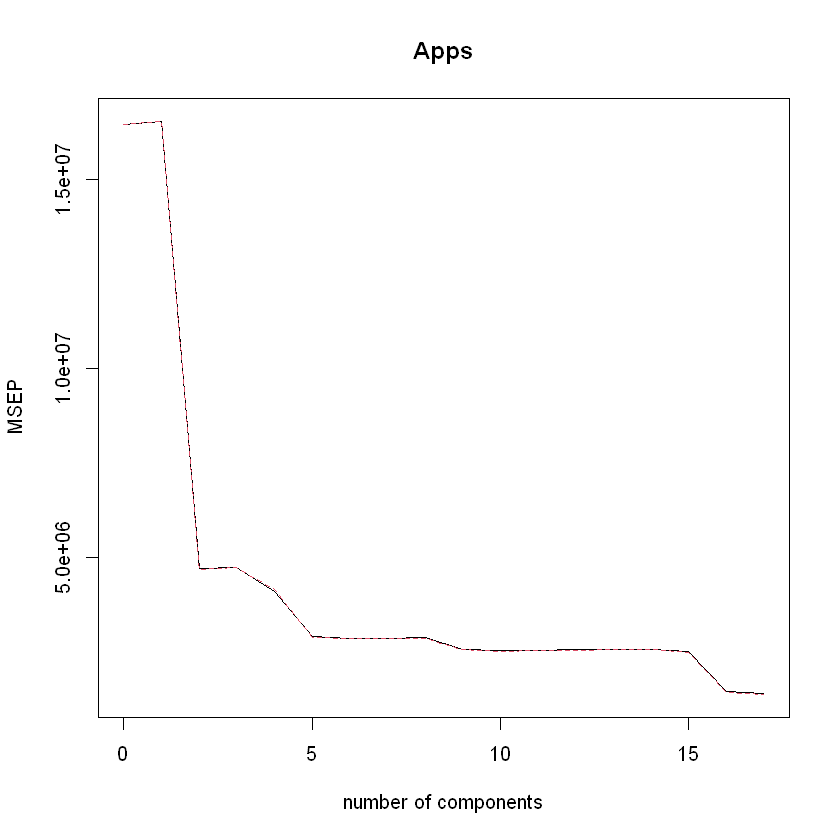

In [70]:
#e)
library(pls)
pcr.fit= pcr(Apps~., data= train, scale=T, validation= "CV")
validationplot(pcr.fit, val.type="MSEP")
pcr.predict= predict(pcr.fit, test, ncomp=17)
TE = mean((test$Apps - pcr.predict)^2)
TE

In [ ]:
#g)
#the linnear model had the lowest terst error, neverthe less there is not much difference bteween the models

In [78]:
#ex7.9
#a) 
library(MASS)
lm.fit = lm(nox~ poly(dis,3),data= Boston)
summary(lm.fit)




Call:
lm(formula = nox ~ poly(dis, 3), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121130 -0.040619 -0.009738  0.023385  0.194904 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.554695   0.002759 201.021  < 2e-16 ***
poly(dis, 3)1 -2.003096   0.062071 -32.271  < 2e-16 ***
poly(dis, 3)2  0.856330   0.062071  13.796  < 2e-16 ***
poly(dis, 3)3 -0.318049   0.062071  -5.124 4.27e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06207 on 502 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7131 
F-statistic: 419.3 on 3 and 502 DF,  p-value: < 2.2e-16


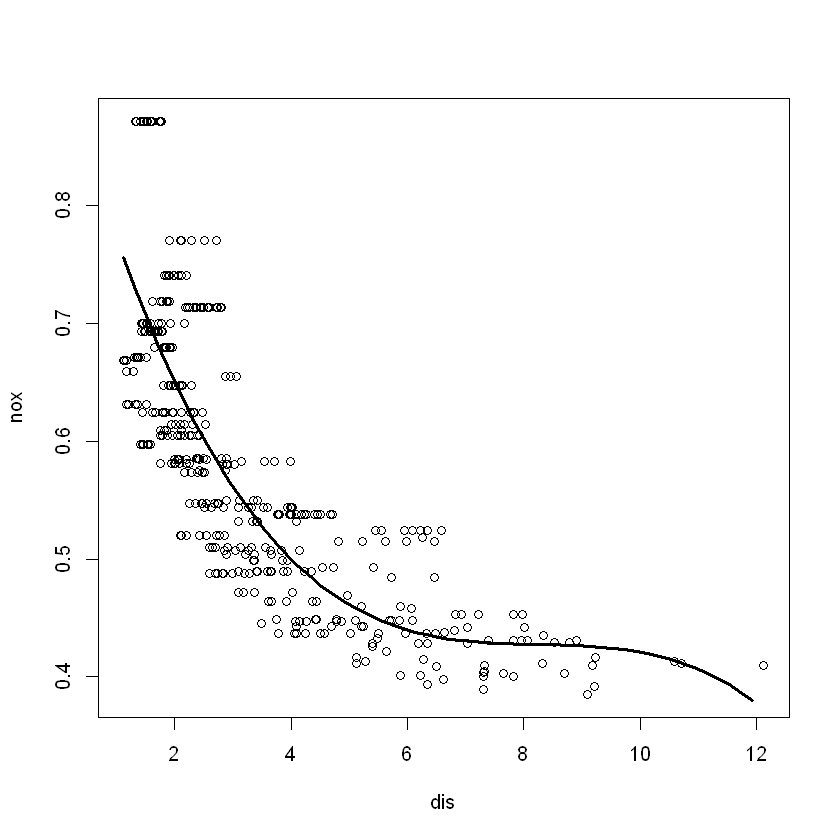

In [83]:
dis.grid = seq(from=min(Boston$dis), to=max(Boston$dis),0.2)
lm.predict = predict(lm.fit, list(dis=dis.grid))
plot(nox~dis, data= Boston)
lines(dis.grid, lm.predict, lwd=3)

In [93]:
#b
rss = rep(0, 10)
for (i in range(1:10)) {
    lm.fit = lm(nox ~ poly(dis, i), data = Boston)
    rss[i] = sum(lm.fit$residuals^2)
}
rss

[1] 2.768563 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
 [9] 0.000000 1.832171

In [113]:
#c
#we select 4
glm.fit = glm(nox ~ dis,data=Boston)
cv.error= cv.glm(Boston, glm.fit, K=10)
cv.error$delta

glm.fit = glm(nox ~ poly(dis,2),data=Boston)
cv.error= cv.glm(Boston, glm.fit, K=10)
cv.error$delta


glm.fit = glm(nox ~ poly(dis,3),data=Boston)
cv.error= cv.glm(Boston, glm.fit, K=10)
cv.error$delta


glm.fit = glm(nox ~ poly(dis,4),data=Boston)
cv.error= cv.glm(Boston, glm.fit, K=10)
cv.error$delta

glm.fit = glm(nox ~ poly(dis,5),data=Boston)
cv.error= cv.glm(Boston, glm.fit, K=10)
cv.error$delta

glm.fit = glm(nox ~ poly(dis,6),data=Boston)
cv.error= cv.glm(Boston, glm.fit, K=10)
cv.error$delta

glm.fit = glm(nox ~ poly(dis,7),data=Boston)
cv.error= cv.glm(Boston, glm.fit, K=10)
cv.error$delta

[1] 0.005517118 0.005514720

[1] 0.004065480 0.004063143

[1] 0.003877090 0.003873995

[1] 0.003867561 0.003864685

[1] 0.004047199 0.004025387

[1] 0.005399638 0.005234901

[1] 0.01112940 0.01038066

In [115]:
#d
library(splines)
spl.fit = lm(nox~bs(dis,df=4), data=Boston)
summary(spl.fit)


Call:
lm(formula = nox ~ bs(dis, df = 4), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.124622 -0.039259 -0.008514  0.020850  0.193891 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.73447    0.01460  50.306  < 2e-16 ***
bs(dis, df = 4)1 -0.05810    0.02186  -2.658  0.00812 ** 
bs(dis, df = 4)2 -0.46356    0.02366 -19.596  < 2e-16 ***
bs(dis, df = 4)3 -0.19979    0.04311  -4.634 4.58e-06 ***
bs(dis, df = 4)4 -0.38881    0.04551  -8.544  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06195 on 501 degrees of freedom
Multiple R-squared:  0.7164,	Adjusted R-squared:  0.7142 
F-statistic: 316.5 on 4 and 501 DF,  p-value: < 2.2e-16


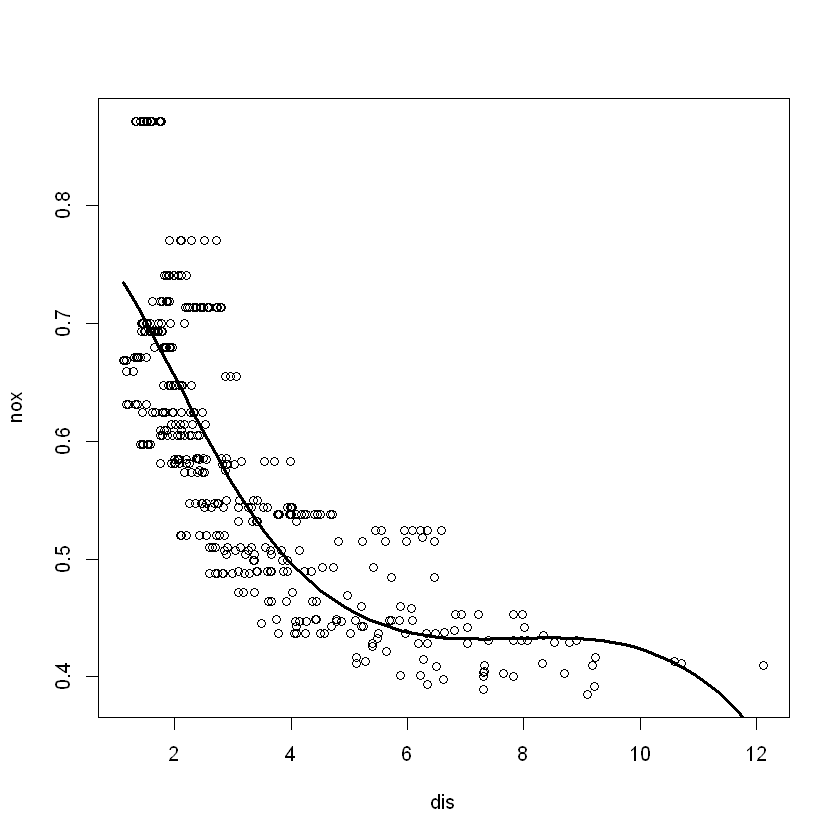

In [116]:
spl.predict = predict(spl.fit, list(dis=dis.grid))
plot(nox~dis, data= Boston)
lines(dis.grid, spl.predict, lwd=3)
#knots are choosen automaticaly when we use the df=

In [117]:
#e)
rss = rep(0, 16)
for (i in range(3:16)) {
    lm.fit = lm(nox ~ bs(dis, df=i), data = Boston)
    rss[i] = sum(lm.fit$residuals^2)
}
rss

[1] 0.000000 0.000000 1.934107 0.000000 0.000000 0.000000 0.000000 0.000000
 [9] 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 1.783546

In [121]:
#f)
rss = rep(NA, 16)
for (i in range(3:16)) {
    glm.fit = glm(nox ~ bs(dis, df=i), data = Boston)
    rss[i] = sum(glm.fit$residuals^2)
}
rss


[1]       NA       NA 1.934107       NA       NA       NA       NA       NA
 [9]       NA       NA       NA       NA       NA       NA       NA 1.783546

In [122]:
#ex7.10
#a)
set.seed(101)
sample = sample.split(College, SplitRatio = .75)
train = subset(College, sample == TRUE)
test = subset(College, sample == FALSE)


In [133]:
library(leaps)
fsw.fit = regsubsets(Outstate~.,data= train, nvmax=17, method="forward")
summary(fsw.fit)
which.max(summary(fsw.fit)$adjr2)
coef(fsw.fit,13)

Subset selection object
Call: regsubsets.formula(Outstate ~ ., data = train, nvmax = 17, method = "forward")
17 Variables  (and intercept)
            Forced in Forced out
PrivateYes      FALSE      FALSE
Apps            FALSE      FALSE
Accept          FALSE      FALSE
Enroll          FALSE      FALSE
Top10perc       FALSE      FALSE
Top25perc       FALSE      FALSE
F.Undergrad     FALSE      FALSE
P.Undergrad     FALSE      FALSE
Room.Board      FALSE      FALSE
Books           FALSE      FALSE
Personal        FALSE      FALSE
PhD             FALSE      FALSE
Terminal        FALSE      FALSE
S.F.Ratio       FALSE      FALSE
perc.alumni     FALSE      FALSE
Expend          FALSE      FALSE
Grad.Rate       FALSE      FALSE
1 subsets of each size up to 17
Selection Algorithm: forward
          PrivateYes Apps Accept Enroll Top10perc Top25perc F.Undergrad
1  ( 1 )  " "        " "  " "    " "    " "       " "       " "        
2  ( 1 )  "*"        " "  " "    " "    " "       " "       " 

[1] 13

(Intercept)    PrivateYes          Apps        Accept     Top10perc 
-1430.5139454  2264.2301442    -0.3364371     0.8386602    26.4729110 
  F.Undergrad    Room.Board      Personal           PhD      Terminal 
   -0.2084908     0.8191289    -0.2458224    13.7271524    32.0966631 
    S.F.Ratio   perc.alumni        Expend     Grad.Rate 
  -75.1416745    32.9443390     0.1830835    20.3105276

In [134]:
names(coef(fsw.fit,13))

[1] "(Intercept)" "PrivateYes"  "Apps"        "Accept"      "Top10perc"  
 [6] "F.Undergrad" "Room.Board"  "Personal"    "PhD"         "Terminal"   
[11] "S.F.Ratio"   "perc.alumni" "Expend"      "Grad.Rate"

In [141]:
library(gam)
gam.model = gam(Outstate ~ Private  +s(Apps,4)+s(Accept,4)+s(Top10perc,4)+s(F.Undergrad,2)+
           s(Room.Board,4)+s(Personal,4)+ s(PhD,4)+s(Terminal,4)+s(S.F.Ratio,4)+s(perc.alumni)+s(Expend,4)+s(Grad.Rate,4),data= train   )

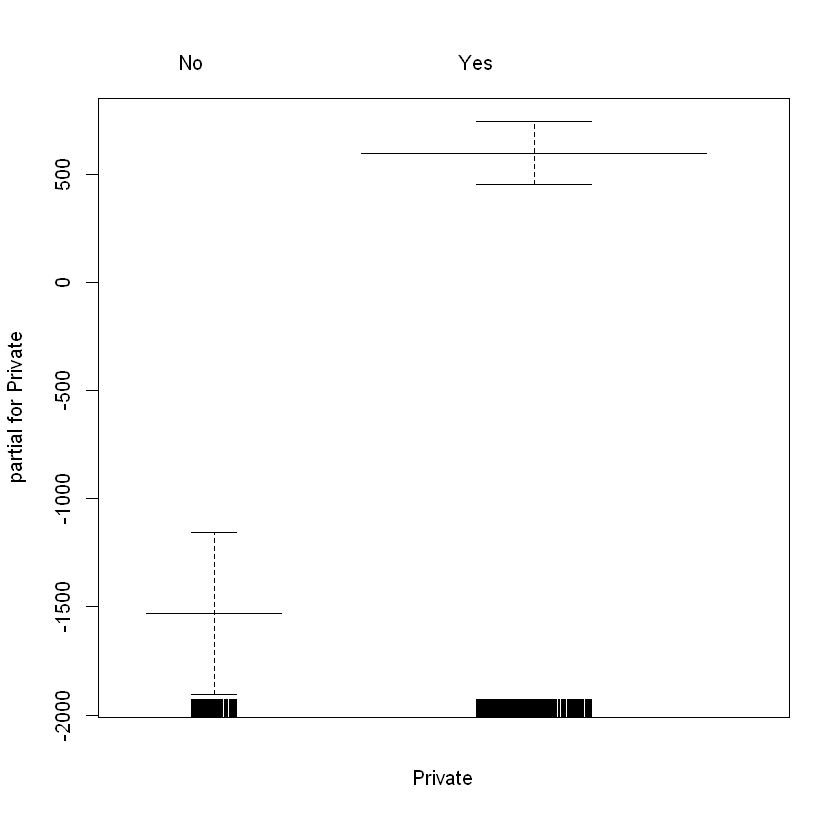

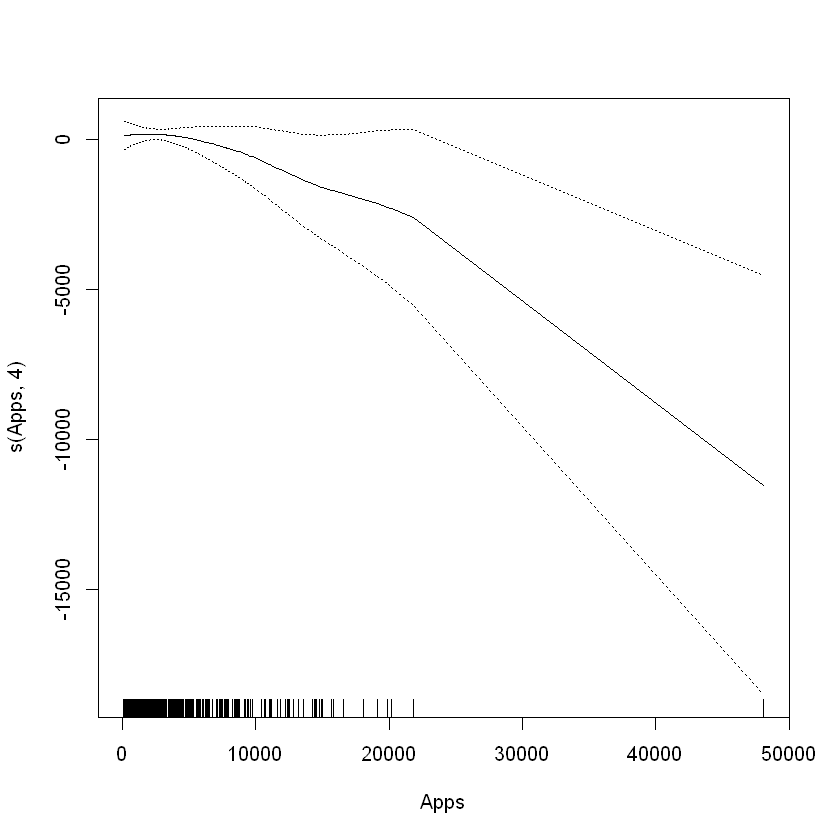

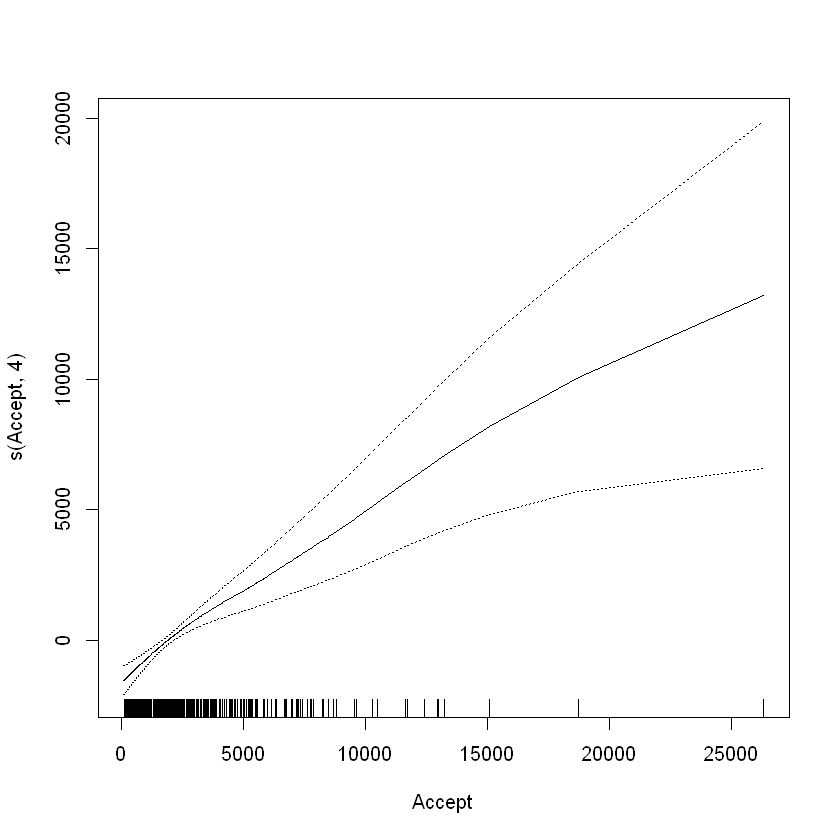

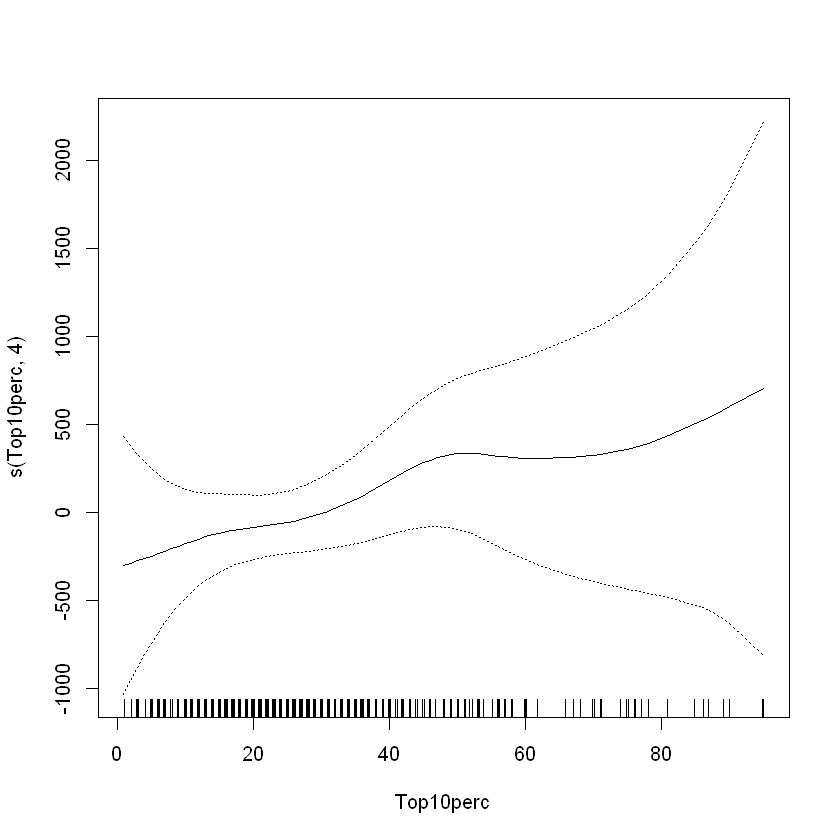

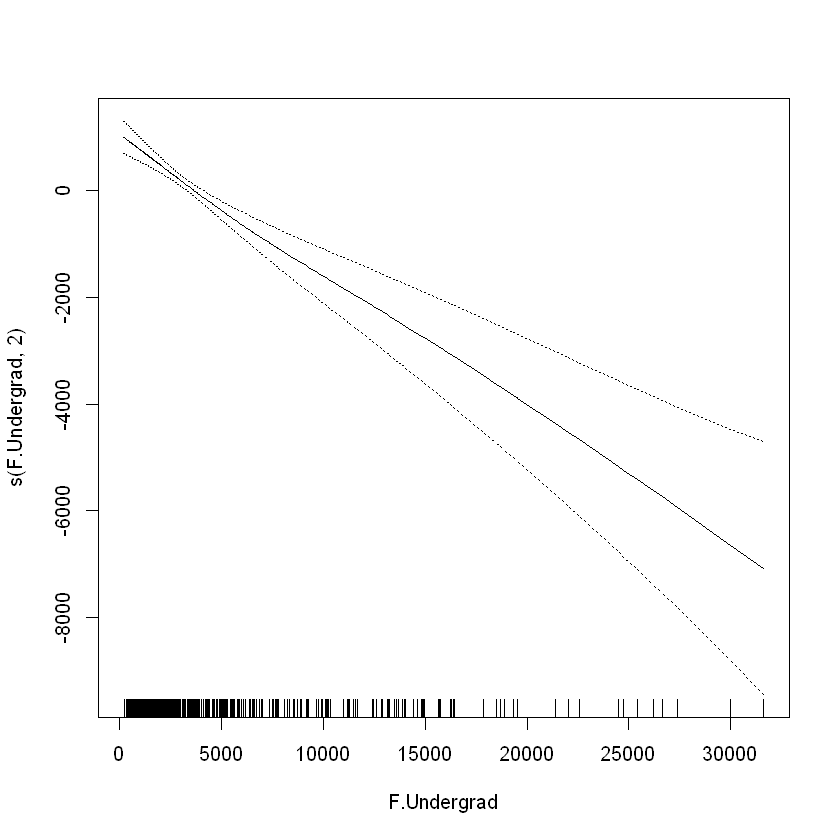

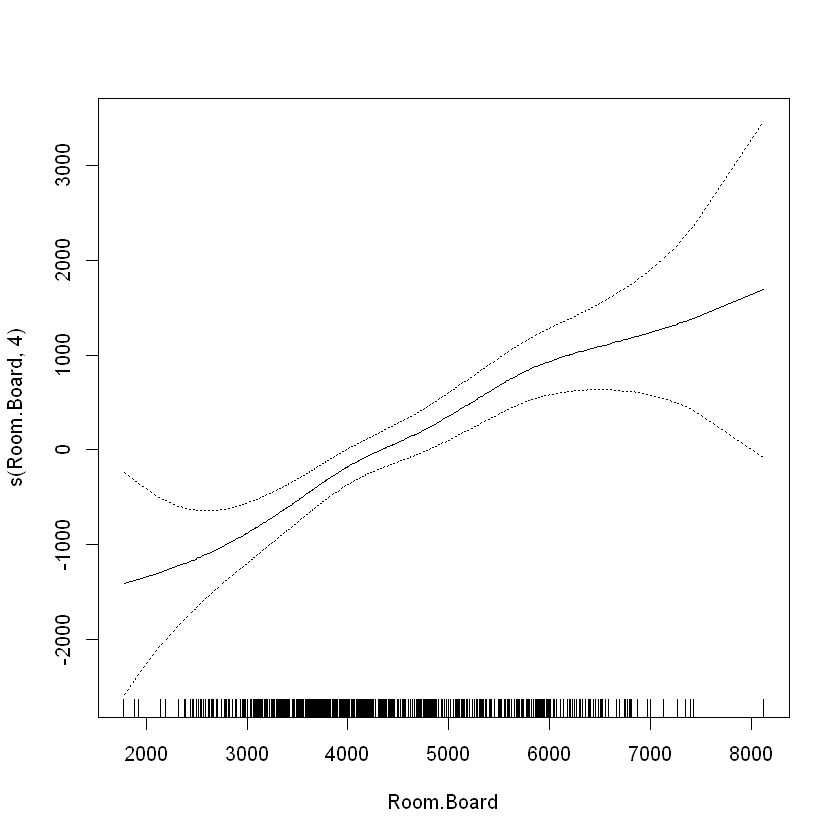

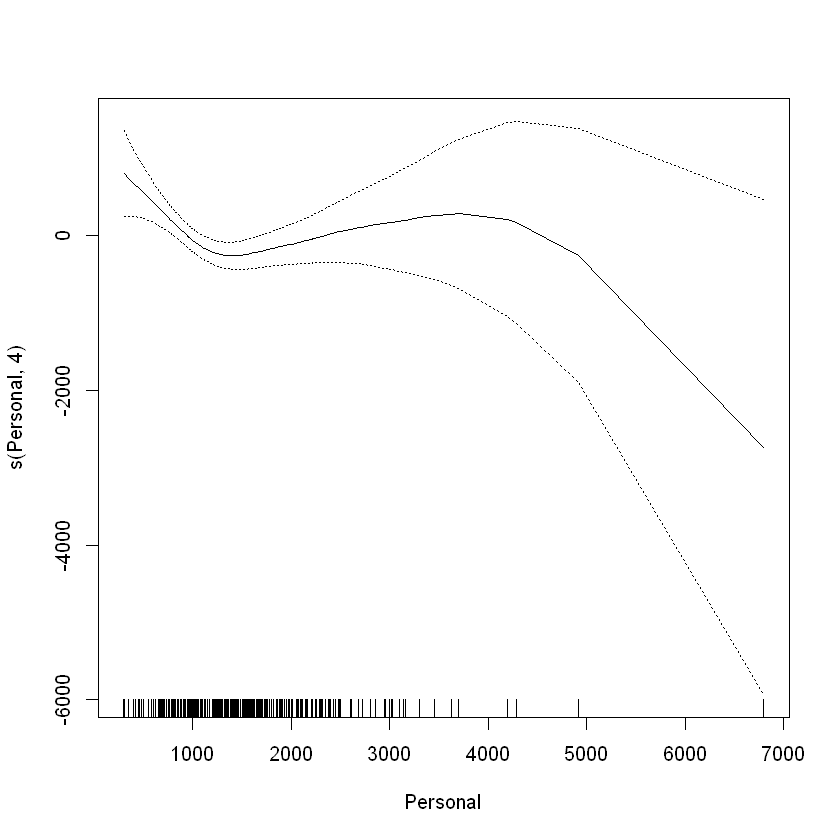

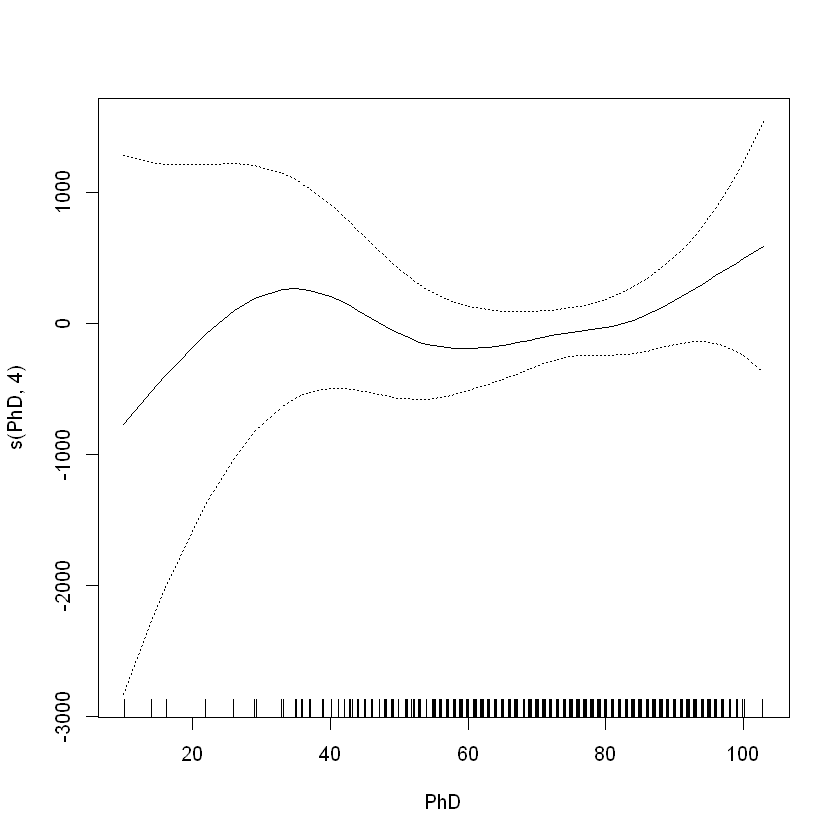

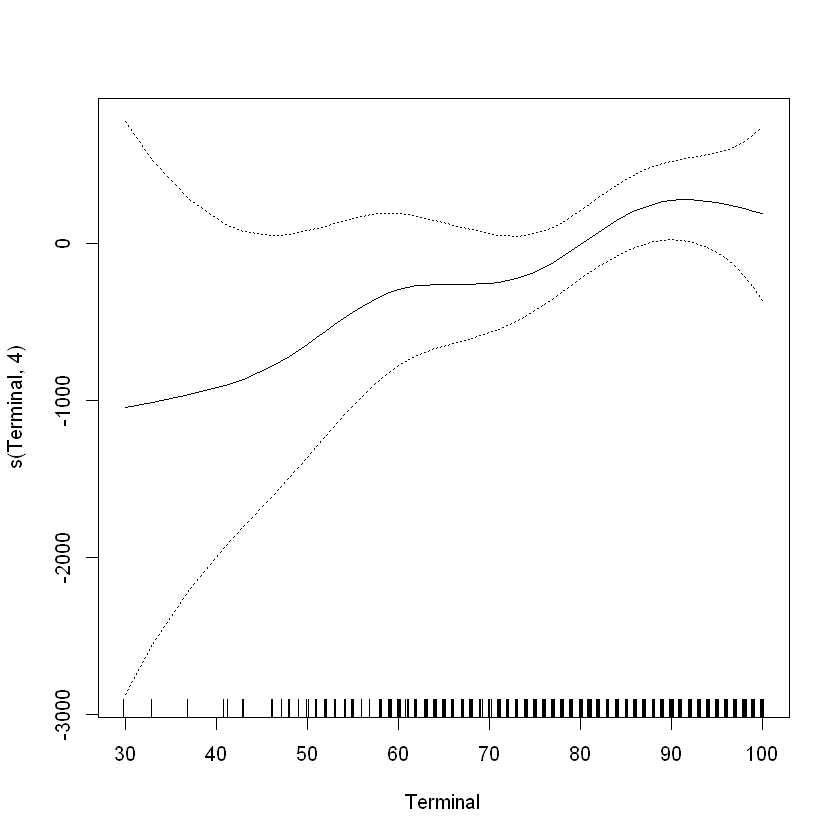

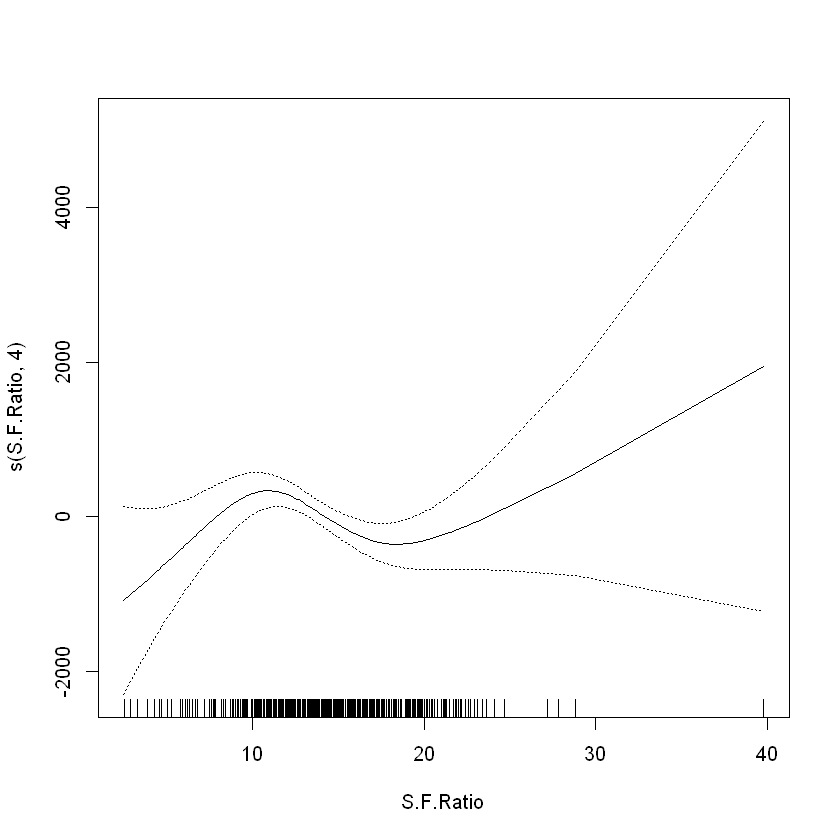

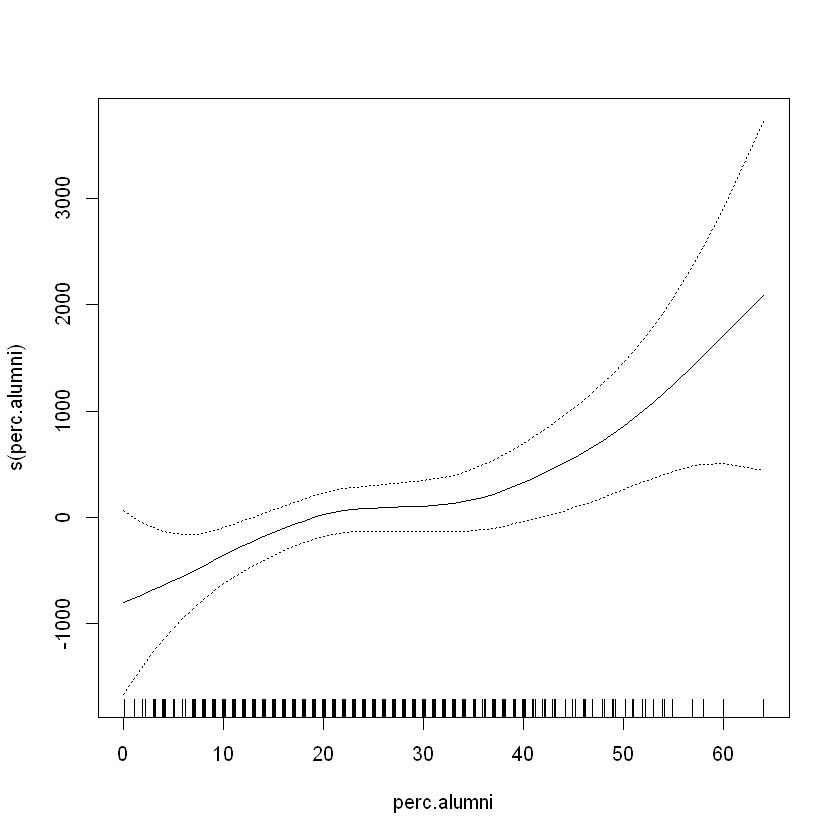

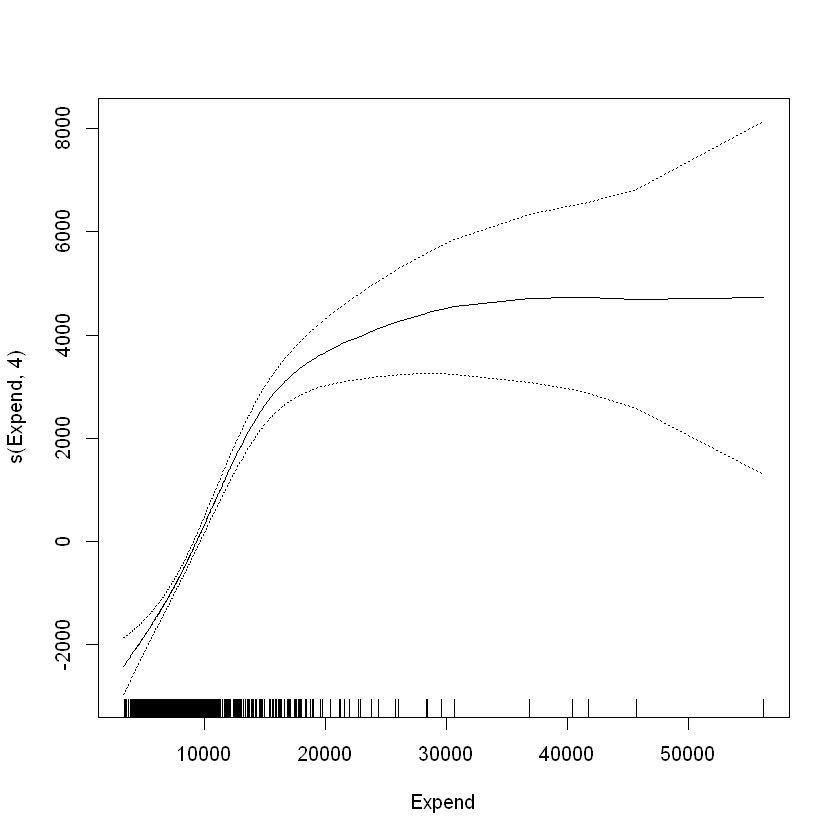

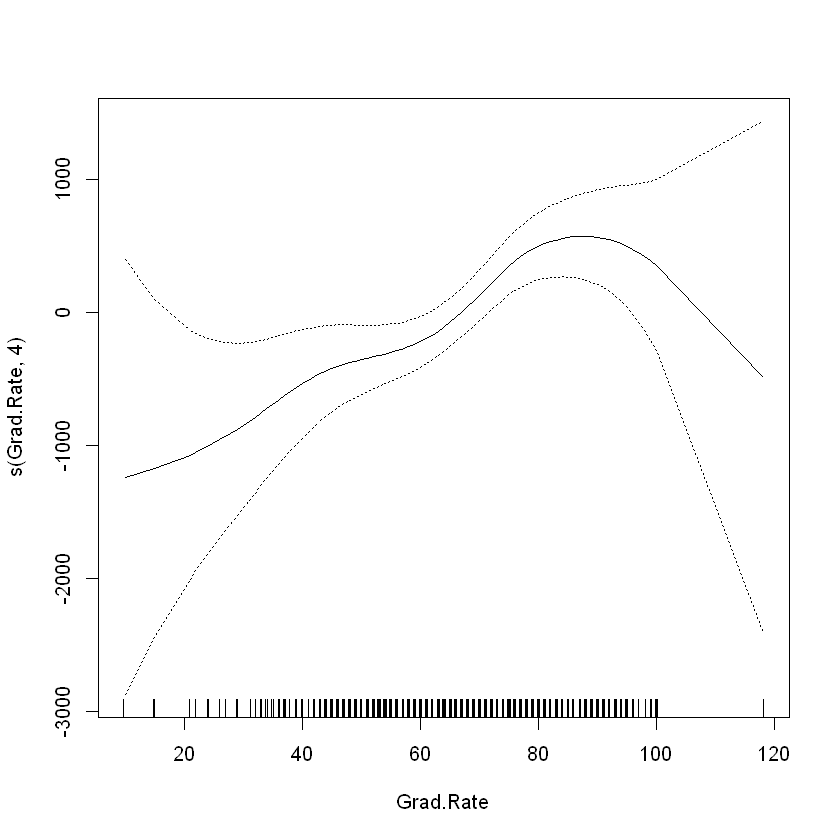

In [143]:
plot(gam.model,se = T)

In [144]:
#d)
summary(gam.model)
#there seems to be a strong non linear relationship between personal, ratio and expese with the response


Call: gam(formula = Outstate ~ Private + s(Apps, 4) + s(Accept, 4) + 
    s(Top10perc, 4) + s(F.Undergrad, 2) + s(Room.Board, 4) + 
    s(Personal, 4) + s(PhD, 4) + s(Terminal, 4) + s(S.F.Ratio, 
    4) + s(perc.alumni) + s(Expend, 4) + s(Grad.Rate, 4), data = train)
Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-6234.4  -976.7   105.6  1050.8  7324.2 

(Dispersion Parameter for gaussian family taken to be 3049833)

    Null Deviance: 9627902319 on 560 degrees of freedom
Residual Deviance: 1564564803 on 513.0002 degrees of freedom
AIC: 10015.94 

Number of Local Scoring Iterations: NA 

Anova for Parametric Effects
                   Df     Sum Sq    Mean Sq F value    Pr(>F)    
Private             1 2871152892 2871152892 941.413 < 2.2e-16 ***
s(Apps, 4)          1  881408211  881408211 289.002 < 2.2e-16 ***
s(Accept, 4)        1  128198333  128198333  42.035 2.110e-10 ***
s(Top10perc, 4)     1  807711739  807711739 264.838 < 2.2e-16 ***
s(F.Undergrad, 2)   1  40627769